In [ ]:
#Aidan Freund 
#CIS 2532 HW 11 Pt3A
# A taken from GitHub user "Josephlee94"
# project "intuitive deep learning" 
# with my own comments

In [30]:
#Required imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout
from keras import regularizers

In [31]:
#import file from github (joeseph lees file)
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/josephlee94/intuitive-deep-learning/master/Part%201%3A%20Predicting%20House%20Prices/housepricedata.csv"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    content = response.text
    data = response.text
    df = pd.read_csv(StringIO(data))
else:
    print('An error occurred:', response.status_code)
    


In [32]:
# Set and manage data
dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]

In [33]:
# normalize data with sklearn to be 0-1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [34]:

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [35]:
###Begining Neural Networks####
#Specify archetecture of network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [36]:
# Model uses sgd algorithm, bce loss function, to track accuracy
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
#Specify how to train model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.6966 - accuracy: 0.4814 - val_loss: 0.6834 - val_accuracy: 0.5251
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.4824 - val_loss: 0.6793 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.4873 - val_loss: 0.6757 - val_accuracy: 0.5251
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.4971 - val_loss: 0.6721 - val_accuracy: 0.5342
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.5558 - val_loss: 0.6685 - val_accuracy: 0.5799
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.6213 - val_loss: 0.6650 - val_accuracy: 0.6621
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.6830 - val_loss: 0.6615 - val_accuracy: 0.7352
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8611 - val_loss: 0.3427 - val_accuracy: 0.8995
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8581 - val_loss: 0.3387 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8630 - val_loss: 0.3352 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.8659 - val_loss: 0.3309 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8659 - val_loss: 0.3277 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3472 - accuracy: 0.8708 - val_loss: 0.3254 - val_accuracy: 0.8721
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3447 - accuracy: 0.8689 - val_loss: 0.3211 - val_accuracy: 0.8950
Epoch 

In [38]:
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8904


0.8904109597206116

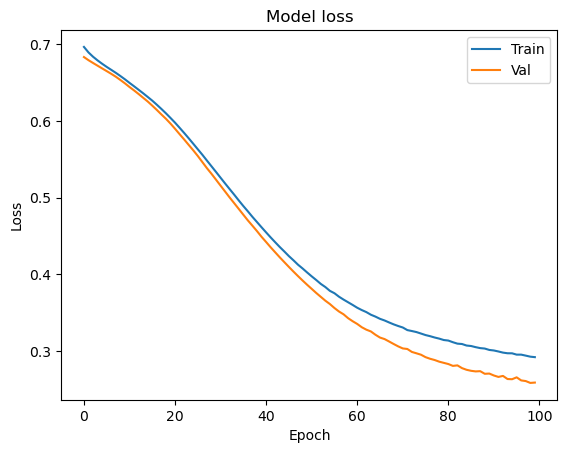

In [39]:
#plot training and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

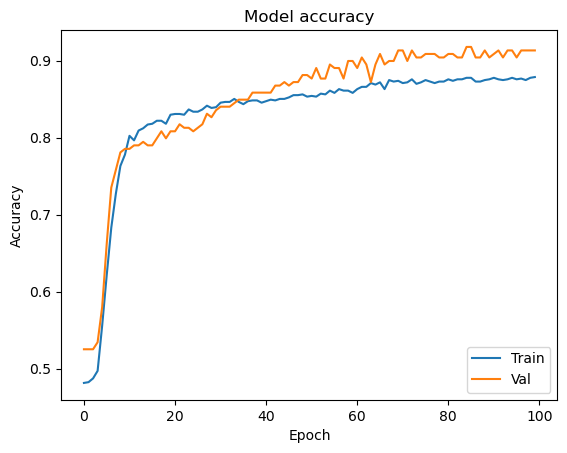

In [40]:
#alternative visual
plt.plot(hist.history['accuracy']) #accuracy (not acc)
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [41]:
#overfitting model
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 39ms/step - loss: 0.4950 - accuracy: 0.7564 - val_loss: 0.3531 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3603 - accuracy: 0.8483 - val_loss: 0.2784 - val_accuracy: 0.8995
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3182 - accuracy: 0.8757 - val_loss: 0.2440 - val_accuracy: 0.9087
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2877 - accuracy: 0.8728 - val_loss: 0.2413 - val_accuracy: 0.9224
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2640 - accuracy: 0.8924 - val_loss: 0.2454 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2565 - accuracy: 0.8943 - val_loss: 0.2162 - val_accuracy: 0.9224
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2440 - accuracy: 0.8953 - val_loss: 0.2303 - val_accuracy: 0.9041
Epoch 

32/32 [==============================] - 2s 48ms/step - loss: 0.1741 - accuracy: 0.9237 - val_loss: 0.2827 - val_accuracy: 0.8995
Epoch 59/100
32/32 [==============================] - 1s 45ms/step - loss: 0.1534 - accuracy: 0.9413 - val_loss: 0.2781 - val_accuracy: 0.9178
Epoch 60/100
32/32 [==============================] - 1s 45ms/step - loss: 0.1270 - accuracy: 0.9462 - val_loss: 0.3718 - val_accuracy: 0.9041
Epoch 61/100
32/32 [==============================] - 1s 46ms/step - loss: 0.1358 - accuracy: 0.9501 - val_loss: 0.3028 - val_accuracy: 0.9087
Epoch 62/100
32/32 [==============================] - 1s 45ms/step - loss: 0.1411 - accuracy: 0.9403 - val_loss: 0.3211 - val_accuracy: 0.9087
Epoch 63/100
32/32 [==============================] - 1s 46ms/step - loss: 0.1808 - accuracy: 0.9286 - val_loss: 0.2866 - val_accuracy: 0.8995
Epoch 64/100
32/32 [==============================] - 2s 49ms/step - loss: 0.1605 - accuracy: 0.9325 - val_loss: 0.2399 - val_accuracy: 0.9178
Epoch 65/100

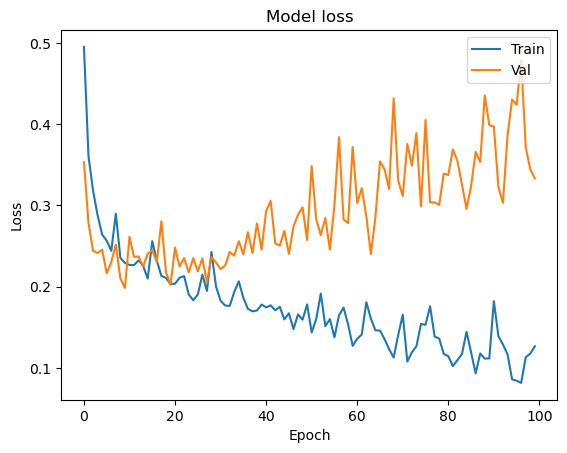

In [42]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

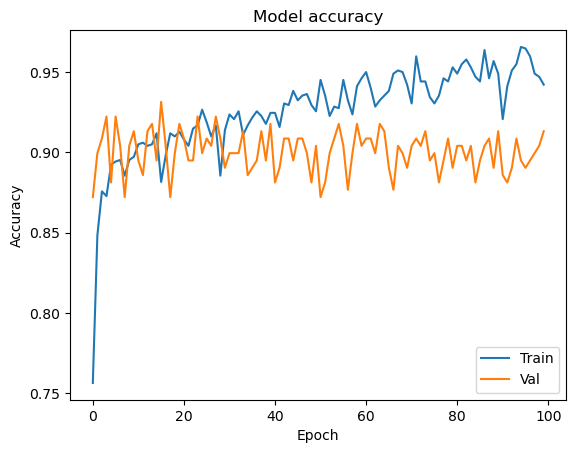

In [43]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
#you can see it would undervalue house prices

In [44]:
#l2 regularization
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [45]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 47ms/step - loss: 14.2418 - accuracy: 0.7221 - val_loss: 3.8532 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 1.7121 - accuracy: 0.8160 - val_loss: 0.7055 - val_accuracy: 0.8265
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.5953 - accuracy: 0.8464 - val_loss: 0.4744 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5280 - accuracy: 0.8650 - val_loss: 0.4758 - val_accuracy: 0.9178
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 0.5094 - accuracy: 0.8591 - val_loss: 0.5355 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4911 - accuracy: 0.8728 - val_loss: 0.4341 - val_accuracy: 0.9269
Epoch 7/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4779 - accuracy: 0.8787 - val_loss: 0.4253 - val_accuracy: 0.9224
Epoch

32/32 [==============================] - 2s 50ms/step - loss: 0.4322 - accuracy: 0.8767 - val_loss: 0.3778 - val_accuracy: 0.9269
Epoch 59/100
32/32 [==============================] - 2s 54ms/step - loss: 0.4327 - accuracy: 0.8748 - val_loss: 0.3938 - val_accuracy: 0.9087
Epoch 60/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4408 - accuracy: 0.8787 - val_loss: 0.3912 - val_accuracy: 0.9178
Epoch 61/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4460 - accuracy: 0.8708 - val_loss: 0.3828 - val_accuracy: 0.9178
Epoch 62/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4523 - accuracy: 0.8836 - val_loss: 0.4132 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4490 - accuracy: 0.8699 - val_loss: 0.3780 - val_accuracy: 0.9224
Epoch 64/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4378 - accuracy: 0.8787 - val_loss: 0.3850 - val_accuracy: 0.9269
Epoch 65/100

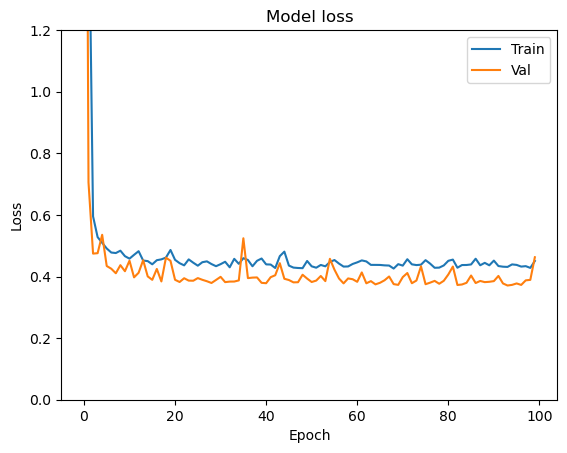

In [46]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

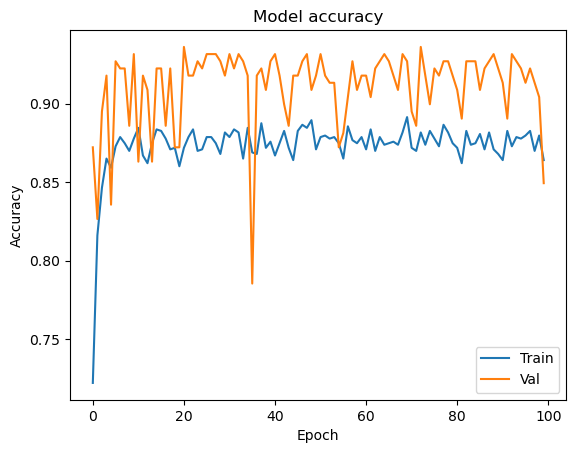

In [47]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
#as you may see it is much closer